In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("rainfall.csv")

In [5]:
sns.set_style("whitegrid")

In [7]:
kpi = {
    "Total Rainfall": df["rainfall"].sum(),
    "Average Temp": df["temperature"].mean(),
    "Avg Humidity": df["humidity"].mean(),
    "Rainy Days": (df["rainfall"] > 0).sum()
}

In [9]:
pd.DataFrame(kpi, index=["Value"])

,Total Rainfall,Average Temp,Avg Humidity,Rainy Days
Value,479.6,17.950943,69.245283,42


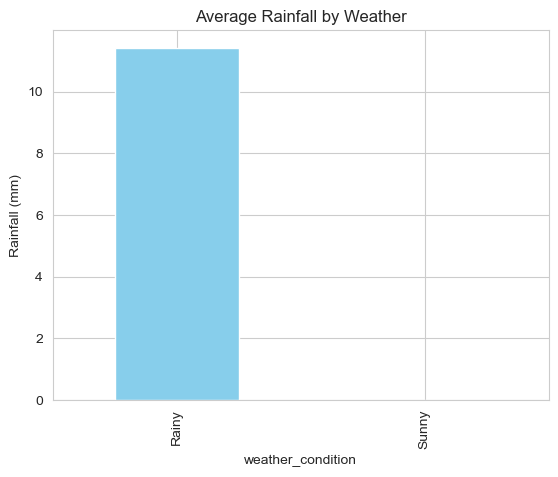

In [11]:
df.groupby("weather_condition")["rainfall"].mean().plot(
    kind="bar", color="skyblue", title="Average Rainfall by Weather"
)
plt.ylabel("Rainfall (mm)")
plt.show()

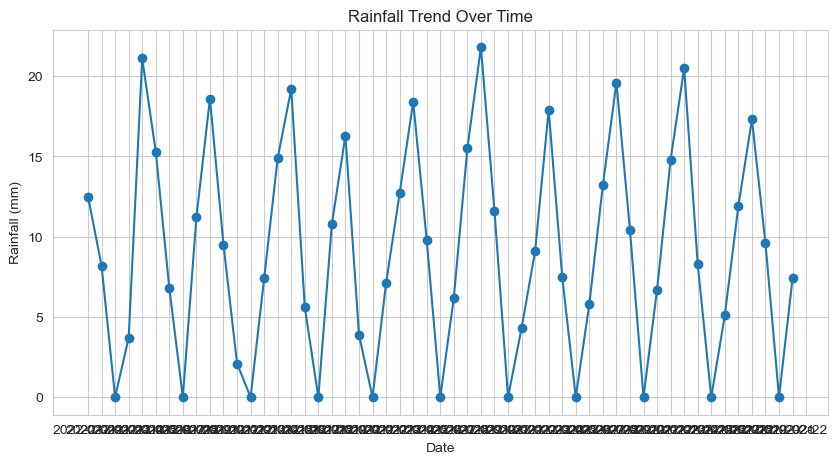

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df["date"], df["rainfall"], marker="o")
plt.title("Rainfall Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.show()

In [15]:
# Filter only rainy days
rainy_days = df[df["weather_condition"] == "Rainy"]
rainy_days

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy
5,2022-01-06,15.3,16.5,75.0,7.8,Rainy
6,2022-01-07,6.8,19.2,61.0,4.5,Rainy
8,2022-01-09,11.2,17.3,73.0,6.1,Rainy
9,2022-01-10,18.6,15.8,79.0,8.9,Rainy
10,2022-01-11,9.5,16.2,72.0,5.7,Rainy
11,2022-01-12,2.1,19.8,58.0,3.5,Rainy


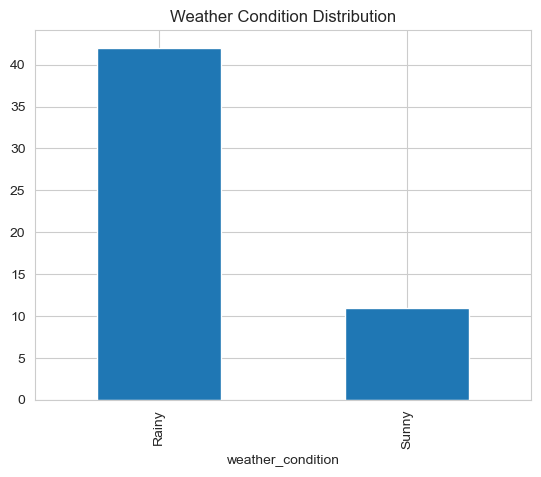

In [17]:
df["weather_condition"].value_counts().plot(
    kind="bar", stacked=True, title="Weather Condition Distribution"
)
plt.show()

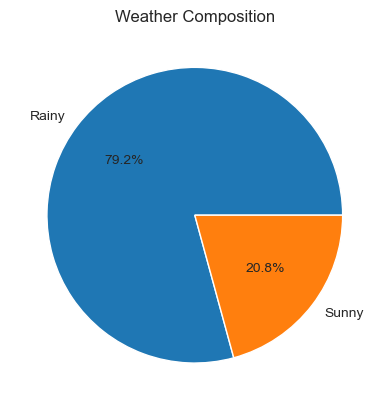

In [19]:
df["weather_condition"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Weather Composition"
)
plt.ylabel("")
plt.show()

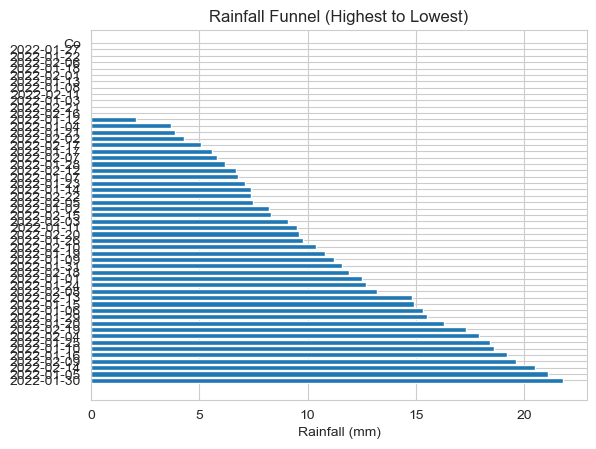

In [21]:
funnel = df.sort_values("rainfall", ascending=False)

plt.barh(funnel["date"].astype(str), funnel["rainfall"])
plt.title("Rainfall Funnel (Highest to Lowest)")
plt.xlabel("Rainfall (mm)")
plt.show()

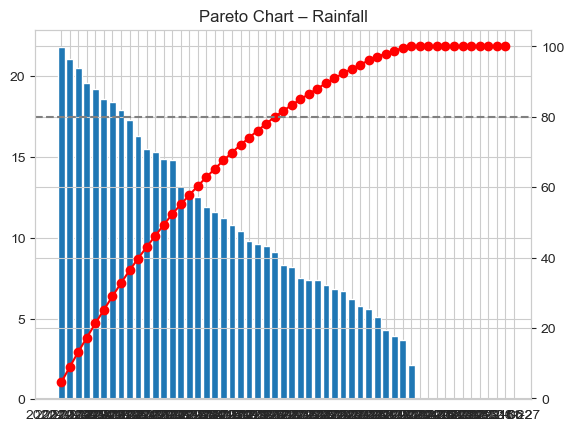

In [23]:
pareto = df.sort_values("rainfall", ascending=False)
pareto["cum_percent"] = pareto["rainfall"].cumsum() / pareto["rainfall"].sum() * 100

fig, ax1 = plt.subplots()
ax1.bar(pareto["date"].astype(str), pareto["rainfall"])
ax2 = ax1.twinx()
ax2.plot(pareto["date"].astype(str), pareto["cum_percent"], color="red", marker="o")

ax2.axhline(80, color="gray", linestyle="--")
ax1.set_title("Pareto Chart – Rainfall")
plt.show()

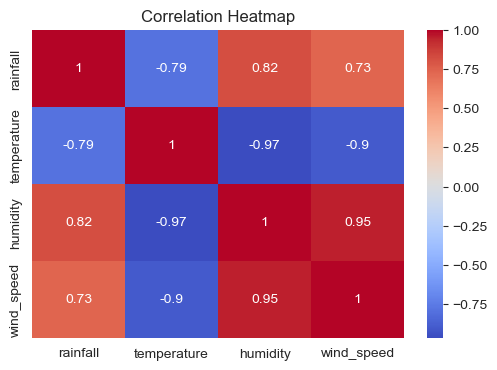

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["rainfall","temperature","humidity","wind_speed"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

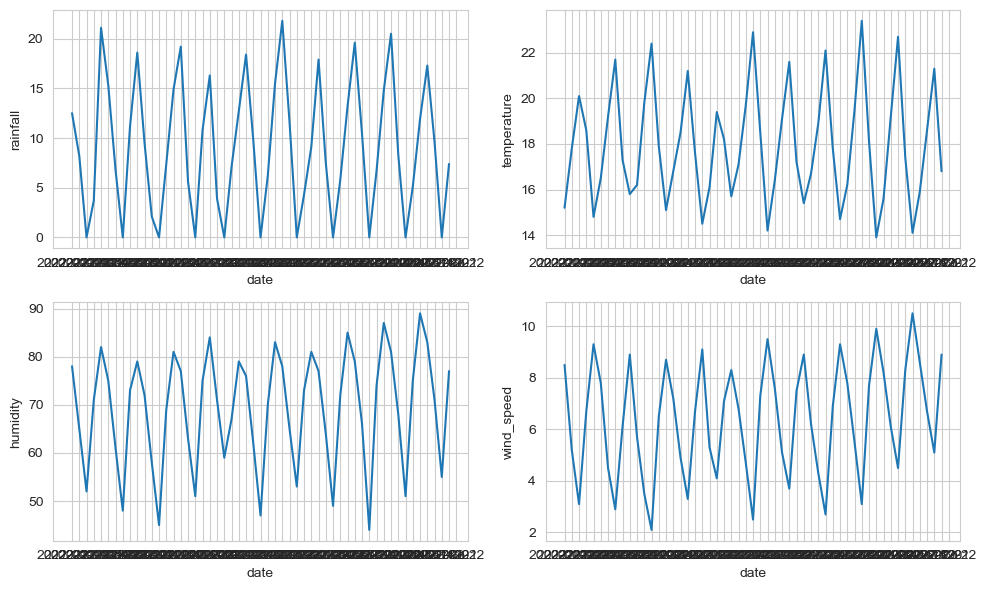

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10,6))

sns.lineplot(ax=axes[0,0], x="date", y="rainfall", data=df)
sns.lineplot(ax=axes[0,1], x="date", y="temperature", data=df)
sns.lineplot(ax=axes[1,0], x="date", y="humidity", data=df)
sns.lineplot(ax=axes[1,1], x="date", y="wind_speed", data=df)

plt.tight_layout()
plt.show()

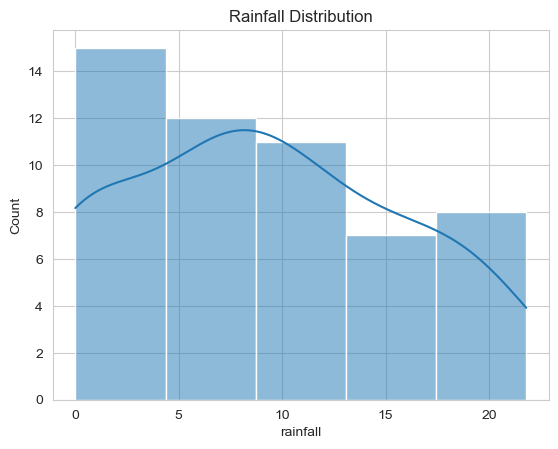

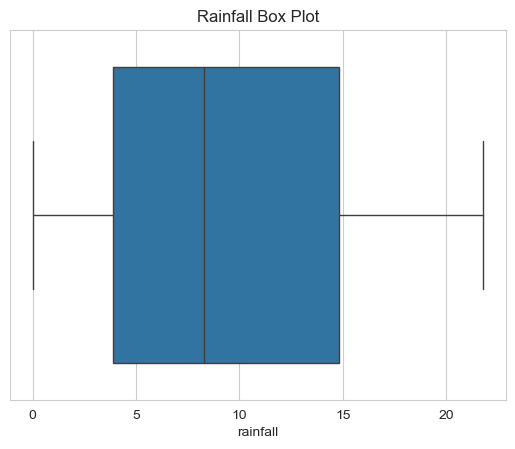

In [29]:
# Histogram
sns.histplot(df["rainfall"], bins=5, kde=True)
plt.title("Rainfall Distribution")
plt.show()

# Box plot
sns.boxplot(x=df["rainfall"])
plt.title("Rainfall Box Plot")
plt.show()

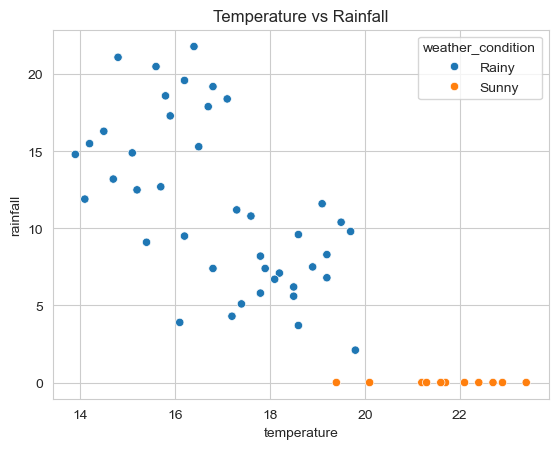

In [31]:
sns.scatterplot(x="temperature", y="rainfall", hue="weather_condition", data=df)
plt.title("Temperature vs Rainfall")
plt.show()